In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/home/dinesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dinesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/dinesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dinesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1675 - acc: 0.9472
Epoch 2/5
60000/60000 [==============================] - 58s 971us/step - loss: 0.0458 - acc: 0.9863
Epoch 3/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0311 - acc: 0.9904
Epoch 4/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0229 - acc: 0.9929
Epoch 5/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0187 - acc: 0.9943


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 362us/step


In [8]:
test_acc

0.9923

In [9]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [11]:
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
######Cat Dogs Classification

In [5]:
import os, shutil
original_dataset_dir = '/home/dinesh/Documents/Challenges/kaggle_original_data'
base_dir = '/home/dinesh/Documents/Challenges/cats_and_dogs_small'
os.mkdir(base_dir)


In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

In [7]:

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [9]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/dinesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dinesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/dinesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dinesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 168s 2s/step - loss: 0.6886 - acc: 0.5365 - val_loss: 0.6902 - val_acc: 0.5330
Epoch 2/30
100/100 [==============================] - 166s 2s/step - loss: 0.6651 - acc: 0.5880 - val_loss: 0.6465 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 173s 2s/step - loss: 0.6288 - acc: 0.6595 - val_loss: 0.6426 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 176s 2s/step - loss: 0.5858 - acc: 0.6885 - val_loss: 0.5944 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 172s 2s/step - loss: 0.5489 - acc: 0.7190 - val_loss: 0.5892 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 174s 2s/step - loss: 0.5209 - acc: 0.7385 - val_loss: 0.5816 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 167s 2s/step - loss: 0.4904 - acc: 0.7640 - val_loss: 0.5653 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 169s 2s/step - 

In [15]:
model.save('cats_and_dogs_small_1.h5')

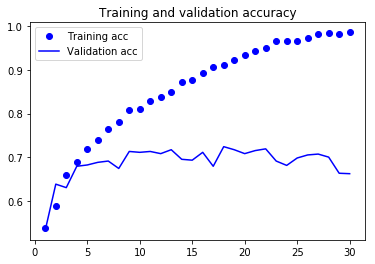

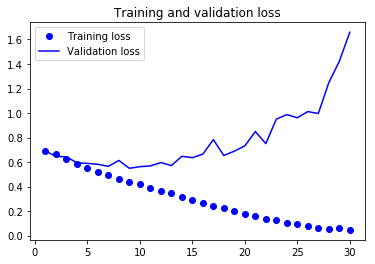

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [18]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

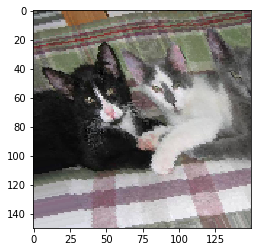

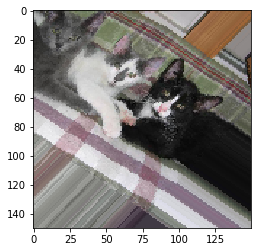

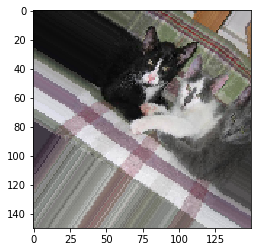

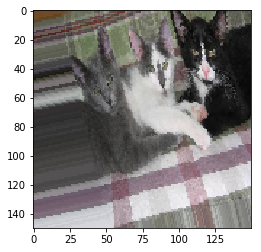

In [20]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 260s 3s/step - loss: 0.6923 - acc: 0.5181 - val_loss: 0.6831 - val_acc: 0.5412
Epoch 2/100
100/100 [==============================] - 278s 3s/step - loss: 0.6849 - acc: 0.5453 - val_loss: 0.6637 - val_acc: 0.6079
Epoch 3/100
100/100 [==============================] - 275s 3s/step - loss: 0.6735 - acc: 0.5725 - val_loss: 0.6555 - val_acc: 0.5761
Epoch 4/100
100/100 [==============================] - 274s 3s/step - loss: 0.6582 - acc: 0.5903 - val_loss: 0.6264 - val_acc: 0.6510
Epoch 5/100
100/100 [==============================] - 273s 3s/step - loss: 0.6407 - acc: 0.6219 - val_loss: 0.6305 - val_acc: 0.6282
Epoch 6/100
100/100 [==============================] - 278s 3s/step - loss: 0.6188 - acc: 0.6616 - val_loss: 0.5882 - val_acc: 0.6777
Epoch 7/100
100/100 [==============================] - 277s 3s/step - loss: 0.6145 - acc: 0.6541 - val_loss: 0.6359 - val_acc: 0.6155
Epoch 8/100
100/100 [==============================] - 278s 3s

Epoch 62/100
100/100 [==============================] - 268s 3s/step - loss: 0.4179 - acc: 0.8037 - val_loss: 0.5150 - val_acc: 0.7614
Epoch 63/100
100/100 [==============================] - 270s 3s/step - loss: 0.4145 - acc: 0.8178 - val_loss: 0.5537 - val_acc: 0.7684
Epoch 64/100
100/100 [==============================] - 268s 3s/step - loss: 0.4333 - acc: 0.8025 - val_loss: 0.4283 - val_acc: 0.8084
Epoch 65/100
100/100 [==============================] - 269s 3s/step - loss: 0.4127 - acc: 0.8106 - val_loss: 0.4177 - val_acc: 0.8090
Epoch 66/100
100/100 [==============================] - 268s 3s/step - loss: 0.4075 - acc: 0.8141 - val_loss: 0.4409 - val_acc: 0.8198
Epoch 67/100
100/100 [==============================] - 269s 3s/step - loss: 0.4186 - acc: 0.8078 - val_loss: 0.4414 - val_acc: 0.7881
Epoch 68/100
100/100 [==============================] - 266s 3s/step - loss: 0.4162 - acc: 0.8041 - val_loss: 0.4131 - val_acc: 0.8249
Epoch 69/100
100/100 [==============================] -

In [24]:
model.save('cats_and_dogs_small_2.h5')

In [25]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 159s 3us/step


In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [27]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/home/dinesh/Documents/Challenges/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i+=1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

In [29]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])


In [30]:
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6197 - acc: 0.6490 - val_loss: 0.4415 - val_acc: 0.8470
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4264 - acc: 0.8155 - val_loss: 0.3682 - val_acc: 0.8450
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3624 - acc: 0.8465 - val_loss: 0.3300 - val_acc: 0.8650
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3162 - acc: 0.8690 - val_loss: 0.3041 - val_acc: 0.8750
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2811 - acc: 0.8915 - val_loss: 0.2842 - val_acc: 0.8960
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2605 - acc: 0.8960 - val_loss: 0.2701 - val_acc: 0.8980
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2509 - acc: 0.9075 - val_loss: 0.2623 - val_acc: 0.9020
Epoch 8/30
200

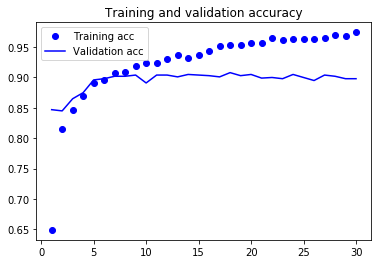

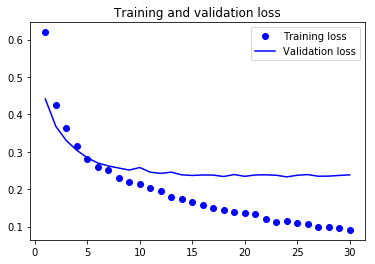

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [35]:
conv_base.trainable = False

In [36]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 1322s 13s/step - loss: 0.5946 - acc: 0.6980 - val_loss: 0.4655 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 1325s 13s/step - loss: 0.4979 - acc: 0.7725 - val_loss: 0.3954 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 1322s 13s/step - loss: 0.4571 - acc: 0.7950 - val_loss: 0.3451 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 1329s 13s/step - loss: 0.4306 - acc: 0.8105 - val_loss: 0.3238 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 1329s 13s/step - loss: 0.4084 - acc: 0.8170 - val_loss: 0.3044 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 1359s 14s/step - loss: 0.3829 - acc: 0.8265 - val_loss: 0.2889 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 1382s 14s/step - loss: 0.3775 - acc: 0.8360 - val_loss: 0.2902 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 1

In [39]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [40]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [41]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 1496s 15s/step - loss: 0.3157 - acc: 0.8585 - val_loss: 0.2702 - val_acc: 0.8990
Epoch 2/100
100/100 [==============================] - 1525s 15s/step - loss: 0.2967 - acc: 0.8670 - val_loss: 0.2322 - val_acc: 0.9060
Epoch 3/100
100/100 [==============================] - 1518s 15s/step - loss: 0.2601 - acc: 0.8915 - val_loss: 0.3249 - val_acc: 0.8810
Epoch 4/100
100/100 [==============================] - 1525s 15s/step - loss: 0.2300 - acc: 0.9050 - val_loss: 0.2254 - val_acc: 0.9120
Epoch 5/100
100/100 [==============================] - 1523s 15s/step - loss: 0.2119 - acc: 0.9115 - val_loss: 0.2072 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 1521s 15s/step - loss: 0.2154 - acc: 0.9095 - val_loss: 0.2281 - val_acc: 0.9160
Epoch 7/100
100/100 [==============================] - 1527s 15s/step - loss: 0.2042 - acc: 0.9130 - val_loss: 0.2027 - val_acc: 0.9250
Epoch 8/100
100/100 [===========================

In [ ]:
def smooth_curve(points, factor=0.8):
smoothed_points = []
for point in points:
    if smoothed_points:
        previous = smoothed_points[-1]
        smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),batch_size=20,class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()